# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [32]:
#Imported needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import math
from collections import defaultdict
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter/netflix.csv')

In [35]:
#Showing all the features in the dataset
pd.set_option("display.max_columns", None)
df.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,s96,TV Show,28 Moons,NaN,"Jin-sung Yang, Kyu-jong Kim, Tae-hwan Kang, Ge...",South Korea,"June 10, 2017",2016,TV-PG,1 Season,"International TV Shows, Korean TV Shows, Roman...",When her fiancé acts strangely upon receiving ...
96,s97,Movie,3 Days to Kill,McG,"Kevin Costner, Amber Heard, Hailee Steinfeld, ...","United States, France, Serbia","December 1, 2020",2014,PG-13,117 min,Action & Adventure,A terminally ill secret agent accepts a risky ...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
98,s99,Movie,3 Generations,Gaby Dellal,"Elle Fanning, Naomi Watts, Susan Sarandon, Tat...",United States,"August 28, 2017",2015,PG-13,92 min,"Dramas, LGBTQ Movies",When teenage Ray begins transitioning from fem...


In [36]:
netflix_shows=df[df['type']=='TV Show']

In [37]:
netflix_movies=df[df['type']=='Movie']

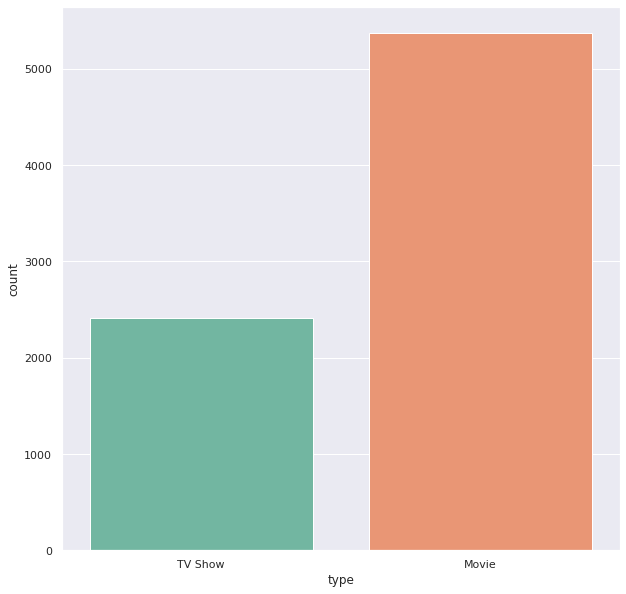

In [38]:
# Tv Shows vs Movies
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

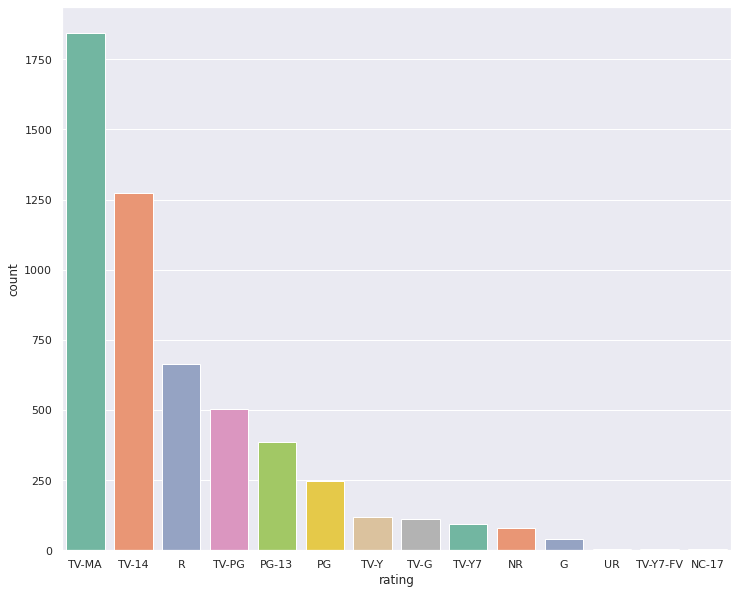

In [39]:
#Movie rating analysis 
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

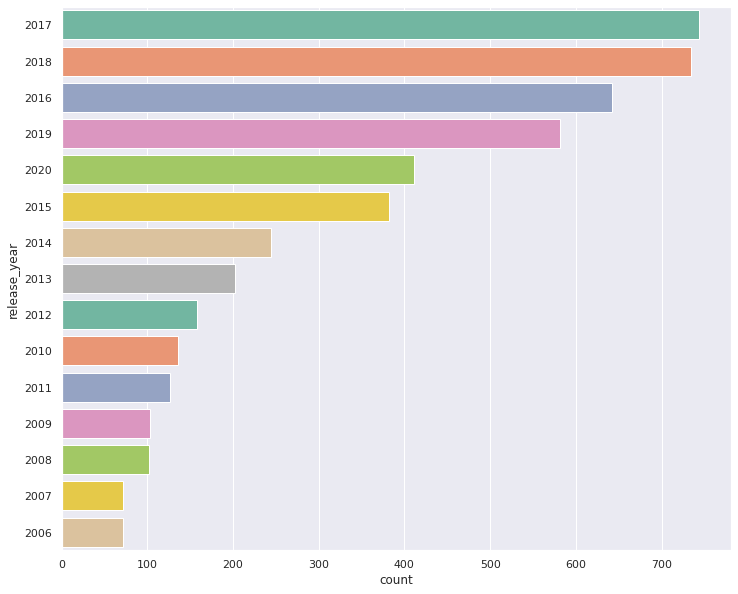

In [40]:
# Year wise analysis 
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

In [41]:
# Top 10 movie content creating countries 
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Missing')
list_country=list(netflix_movies['country'])
for i in list_country:
    # print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1


In [42]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'France'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Japan')]

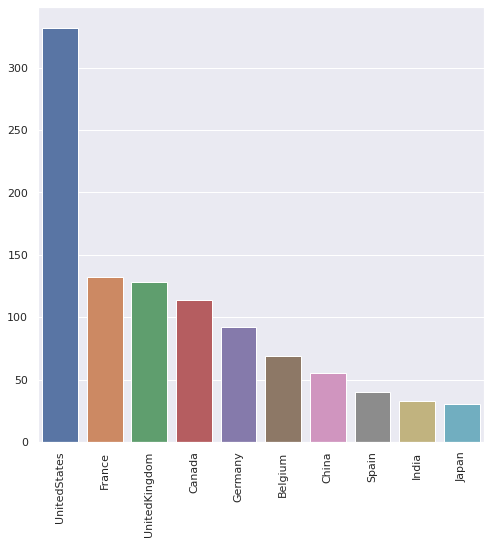

In [43]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

In [44]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

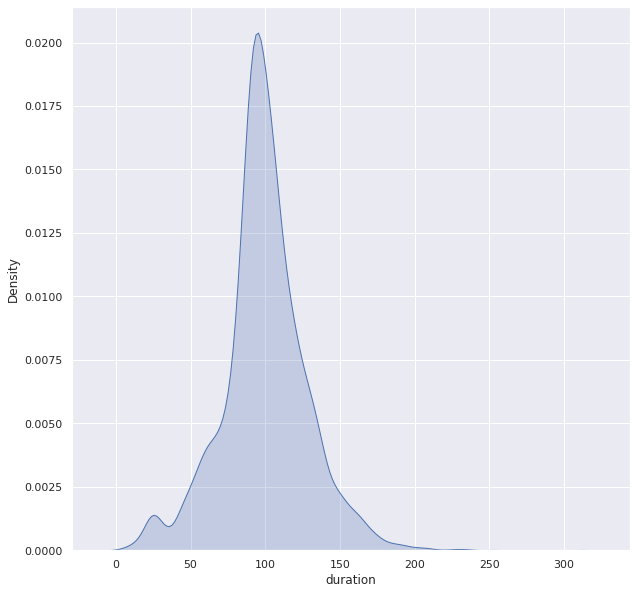

In [45]:
#Analysis on the duration of the movies 
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

In [46]:
from collections import Counter

genres_movies=list(netflix_movies['listed_in'])
gen_movies=[]

for i in genres_movies:
    i=list(i.split(','))
    for j in i:
        gen_movies.append(j.replace(' ',""))
g_movies=Counter(gen_movies)
g_movies

Counter({'Action&Adventure': 721,
         'AnimeFeatures': 57,
         'Children&FamilyMovies': 532,
         'ClassicMovies': 103,
         'Comedies': 1471,
         'CultMovies': 59,
         'Documentaries': 786,
         'Dramas': 2106,
         'Faith&Spirituality': 57,
         'HorrorMovies': 312,
         'IndependentMovies': 673,
         'InternationalMovies': 2437,
         'LGBTQMovies': 90,
         'Movies': 56,
         'Music&Musicals': 321,
         'RomanticMovies': 531,
         'Sci-Fi&Fantasy': 218,
         'SportsMovies': 196,
         'Stand-UpComedy': 329,
         'Thrillers': 491})

In [47]:
genres_shows=list(netflix_shows['listed_in'])
gen_shows=[]

for i in genres_shows:
    i=list(i.split(','))
    for j in i:
        gen_shows.append(j.replace(' ',""))
g_shows=Counter(gen_shows)
g_shows

Counter({'AnimeSeries': 148,
         'BritishTVShows': 232,
         'Classic&CultTV': 27,
         'CrimeTVShows': 427,
         'Docuseries': 353,
         'InternationalTVShows': 1199,
         "Kids'TV": 414,
         'KoreanTVShows': 150,
         'RealityTV': 222,
         'RomanticTVShows': 333,
         'Science&NatureTV': 85,
         'Spanish-LanguageTVShows': 147,
         'Stand-UpComedy&TalkShows': 52,
         'TVAction&Adventure': 150,
         'TVComedies': 525,
         'TVDramas': 704,
         'TVHorror': 69,
         'TVMysteries': 90,
         'TVSci-Fi&Fantasy': 76,
         'TVShows': 12,
         'TVThrillers': 50,
         'TeenTVShows': 60})

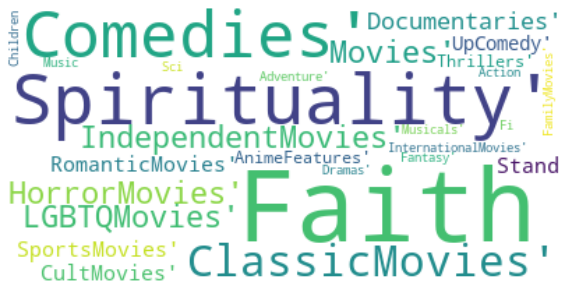

In [48]:
# Word Cloud for Genere in movies 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text1 = list(set(gen_movies))
plt.rcParams['figure.figsize'] = (10, 10)

#assigning shape to the word cloud
# mask = np.array(Image.open('../input/masks/star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text1))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

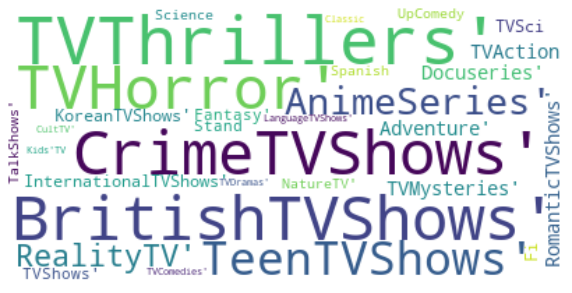

In [49]:
# Word Cloud for Genere in TV Shows 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text2 = list(set(gen_shows))
plt.rcParams['figure.figsize'] = (10, 10)

#assigning shape to the word cloud
# mask = np.array(Image.open('../input/masks/star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text2))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

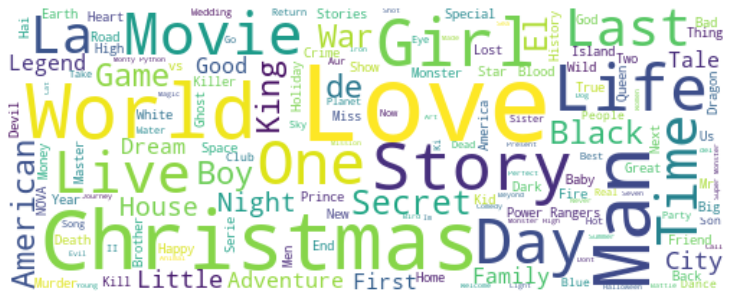

In [50]:
# Word Cloud for the titles 
text3 = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200, max_words = 150).generate(text3)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [51]:
#Most casted people in the TV Shows

cast_shows=list(netflix_shows['cast'])
cast_gen_shows=[]

for i in cast_shows:
      i=list(str(i).split(','))
      for j in i:
        cast_gen_shows.append(j.replace(' ',""))
cast_g_shows = Counter(cast_gen_shows)

    

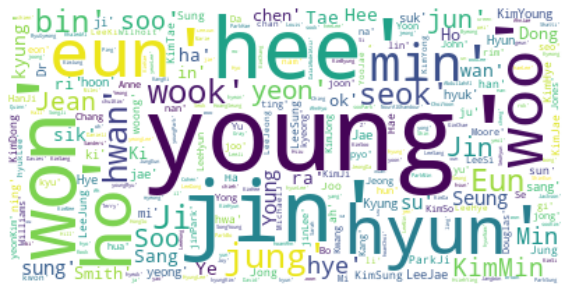

In [52]:
text4 = list(set(cast_gen_shows))
plt.rcParams['figure.figsize'] = (10, 10)

#assigning shape to the word cloud
# mask = np.array(Image.open('../input/masks/star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text4))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [53]:
# Looking for countries and number of netflix productions
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if type(df['country'][i])== str:
    split=df['country'][i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'][i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'][i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [55]:
#Top 20 countries
top_countries=country_df.head(20)
top_countries = top_countries[top_countries['country']!='']
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3297,866,2431
1,India,990,75,915
2,United Kingdom,723,256,467
3,Canada,412,126,286
4,France,349,84,265
5,Japan,287,184,103
6,Spain,215,57,158
7,South Korea,212,157,55
8,Germany,199,42,157
9,Mexico,154,53,101


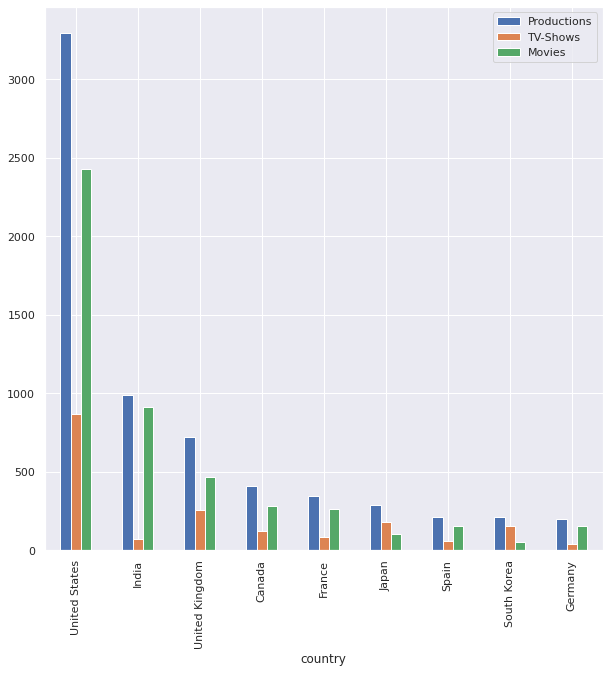

In [56]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

In [57]:
import plotly.express as px

import plotly.graph_objects as go

from plotly.subplots import make_subplots

import plotly.figure_factory as ff
# content release over the year by content type
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['release_year'].value_counts().reset_index()
temp_df2 = df2['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)'))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['release_year'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)'))


layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR BY CONTENT TYPE' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')